### Basic Linear regression

In [1]:
import numpy as np

In [12]:
X1 = 2*np.random.rand(100,1)
y1 = 2 + 3*X1 +np.random.randn(100,1)

In [ ]:
?np.random.rand
# note that random and randn give slightly different outputs. 

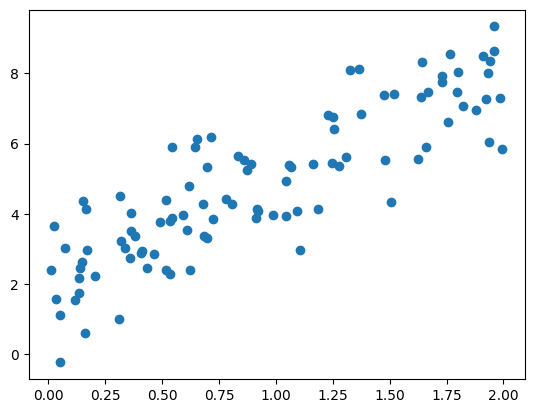

In [13]:
import matplotlib.pyplot as plt

plt.scatter(X1, y1)
plt.show()

In [15]:
X_b = np.c_[np.ones((100, 1)), X1] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y1)

In [16]:
theta_best

array([[2.06223514],
       [2.98454566]])

In [17]:
X_new = np.array([[0], [2]])
print(X_new)
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

[[0]
 [2]]


array([[2.06223514],
       [8.03132645]])

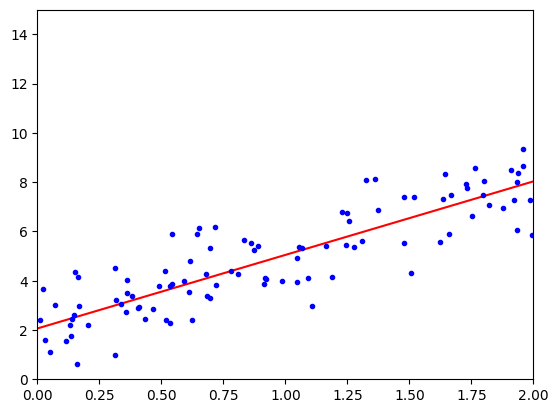

In [18]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X1, y1, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [19]:
# using scikit learn is much faster 

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X1, y1)

LinearRegression()

In [21]:
lin_reg.coef_, lin_reg.intercept_

(array([[2.98454566]]), array([2.06223514]))

In [25]:
lin_reg.predict(np.array([[3], [3.5], [4]])) # single dimension problem 

array([[11.0158721 ],
       [12.50814493],
       [14.00041776]])

^ which turns out to be the same as the one using normal equations after accounting for floating point error. 

#### Motivation for SGD, GD, batch GD

The SVD approach used by Scikit-Learn’s LinearRegression class is about O(n^2). If you double the number of features, you multiply the computation time by roughly 4.
In case of large no of features, training on the _entire_ dataset may not be necessary (100,000 features); so SGD, Batch GD come on.

In [79]:
# vectorized Batch Gradient descent 
X_b = np.c_[np.ones((100, 1)), X1] # stack a column of ones; scikit learn does this automatically. 

max_iters = 200 
eta = 0.1
m = 100

theta = np.random.randn(2,1)

In [80]:
for k in range(max_iters):
    grad = 2/m * X_b.T.dot(X_b.dot(theta) - y1)
    theta = theta - eta*grad

In [81]:
theta

array([[2.0625606 ],
       [2.98425904]])

In [ ]:
from sklearn.svm import LinearSVC

lin_svm = LinearSVC(loss='hinge', )